In [ ]:
# IMPORTANT NOTE THE FOLLOWING CELL NUMBERS CONTAIN THE PLOTS
# 22, 32, 49, 66, 85, 101, 117, 133
# THE FOLLOWING NUMBERS ARE THE PAGE VALUES THAT CONTAIN THE PLOTS
# 6, 9, 13, 17, 22, 27, 31, 36

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
housing = pd.read_csv('Housing.csv')
housing.head()
m = len(housing)
m

545

In [3]:
def compute_cost(X, y, theta): # computing cost for theta
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    j = 1 / (2 * m) * np.sum(sqrErrors) 
    
    return j



def compute_cost1(X, y, theta, lam): # computing cost for theta
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    j = 1/(2*m) * (np.sum(sqrErrors) + lam * (np.sum(theta) - theta[0]))
    
    return j



def gradient_descent(X, X2, y, y2, theta, alpha, iterations): # computing the cost for linear regression
    cost_history = np.zeros(iterations)
    cost_history2 = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / 381) * X.transpose().dot(errors);
        theta = theta - sum_delta;
        cost_history[i] = compute_cost(X, y, theta)
        cost_history2[i] = compute_cost(X2, y2, theta)
        
    return theta, cost_history, cost_history2



def gradient_descent1(X, X2, y, y2, theta, alpha, iterations, lam): # computing the cost for linear regression
    cost_history = np.zeros(iterations)
    cost_history2 = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors);
        theta = theta * (1 - alpha * (lam/m))-sum_delta;
        cost_history[i] = compute_cost1(X, y, theta, lam)
        cost_history2[i] = compute_cost(X2, y2, theta)
        
    return theta, cost_history, cost_history2

In [4]:
#Problem 1.a

In [5]:
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

housing[varlist] = housing[varlist].apply(binary_map)

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [6]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 0)
df_train.shape

(381, 13)

In [7]:
df_test.shape

(164, 13)

In [8]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]
df_Newtrain.head()
# df_Newtest.head()

,area,bedrooms,bathrooms,stories,parking,price,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
454,4500,3,1,2,0,3143000,1,0,0,0,1,0
392,3990,3,1,2,0,3500000,1,0,0,0,0,0
231,4320,3,1,1,0,4690000,1,0,0,0,0,1
271,1905,5,1,2,0,4340000,0,0,1,0,0,0
250,3510,3,1,3,0,4515000,1,0,0,0,0,0


In [9]:
df_Newtrain.shape

(381, 12)

In [10]:
area_train = df_Newtrain.values[:, 0]
bedrooms_train = df_Newtrain.values[:, 1]
bathrooms_train = df_Newtrain.values[:, 2]
stories_train = df_Newtrain.values[:, 3]
parking_train = df_Newtrain.values[:, 4]
price_train = df_Newtrain.values[:, 5]
mainroad_train = df_Newtrain.values[:, 6]
guestroom_train = df_Newtrain.values[:, 7]
basement_train = df_Newtrain.values[:, 8]
hotwaterheating_train = df_Newtrain.values[:, 9]
airconditioning_train = df_Newtrain.values[:, 10]
prefarea_train = df_Newtrain.values[:, 11]
area_train[: 5], bedrooms_train[: 5], bathrooms_train[: 5], stories_train[: 5], parking_train[: 5], price_train[: 5]

(array([4500, 3990, 4320, 1905, 3510], dtype=int64),
 array([3, 3, 3, 5, 3], dtype=int64),
 array([1, 1, 1, 1, 1], dtype=int64),
 array([2, 2, 1, 2, 3], dtype=int64),
 array([0, 0, 0, 0, 0], dtype=int64),
 array([3143000, 3500000, 4690000, 4340000, 4515000], dtype=int64))

In [11]:
theta = np.zeros(6)
theta

array([0., 0., 0., 0., 0., 0.])

In [12]:
x_0 = np.ones((381, 1)) # creating matrix with column of ones
area_train1 = area_train.reshape(381,1)
area_train1[:5]

x_0 = np.ones((381, 1)) # creating matrix with column of ones
bedrooms_train1 = bedrooms_train.reshape(381,1)
bedrooms_train1[:5]

x_0 = np.ones((381, 1)) # creating matrix with column of ones
bathrooms_train1 = bathrooms_train.reshape(381,1)
bathrooms_train1[:5]

x_0 = np.ones((381, 1)) # creating matrix with column of ones
stories_train1 = stories_train.reshape(381,1)
stories_train1[:5]

x_0 = np.ones((381, 1)) # creating matrix with column of ones
parking_train1 = parking_train.reshape(381,1)
parking_train1[:5]

array([[0],
       [0],
       [0],
       [0],
       [0]], dtype=int64)

In [13]:
iterations = 1500;
alpha = .0000000001;

In [14]:
X = np.hstack((x_0,area_train1,bedrooms_train1,bathrooms_train1,stories_train1,parking_train1))
X[:2]

array([[1.00e+00, 4.50e+03, 3.00e+00, 1.00e+00, 2.00e+00, 0.00e+00],
       [1.00e+00, 3.99e+03, 3.00e+00, 1.00e+00, 2.00e+00, 0.00e+00]])

In [15]:
cost = compute_cost(X, price_train, theta)
print('The cost for given values of theta_0 and theta_1 =', cost)

The cost for given values of theta_0 and theta_1 = 9170960481173.027


In [16]:
theta = np.zeros(6)
theta

array([0., 0., 0., 0., 0., 0.])

In [17]:
area_test = df_Newtest.values[:, 0]
bedrooms_test = df_Newtest.values[:, 1]
bathrooms_test = df_Newtest.values[:, 2]
stories_test = df_Newtest.values[:, 3]
parking_test = df_Newtest.values[:, 4]
price_test = df_Newtest.values[:, 5]
mainroad_test = df_Newtest.values[:, 6]
guestroom_test = df_Newtest.values[:, 7]
basement_test = df_Newtest.values[:, 8]
hotwaterheating_test = df_Newtest.values[:, 9]
airconditioning_test = df_Newtest.values[:, 10]
prefarea_test = df_Newtest.values[:, 11]
area_test[: 5], bedrooms_test[: 5], bathrooms_test[: 5], stories_test[: 5], parking_test[: 5], price_test[: 5]

(array([ 4000,  9620,  3460, 13200,  3660], dtype=int64),
 array([3, 3, 4, 2, 4], dtype=int64),
 array([1, 1, 1, 1, 1], dtype=int64),
 array([2, 1, 2, 1, 2], dtype=int64),
 array([1, 2, 0, 1, 0], dtype=int64),
 array([4585000, 6083000, 4007500, 6930000, 2940000], dtype=int64))

In [18]:
x_0 = np.ones((164, 1)) # creating matrix with column of ones
area_test1 = area_test.reshape(164,1)
area_test1[:5]

x_0 = np.ones((164, 1)) # creating matrix with column of ones
bedrooms_test1 = bedrooms_test.reshape(164,1)
bedrooms_test1[:5]

x_0 = np.ones((164, 1)) # creating matrix with column of ones
bathrooms_test1 = bathrooms_test.reshape(164,1)
bathrooms_test1[:5]

x_0 = np.ones((164, 1)) # creating matrix with column of ones
stories_test1 = stories_test.reshape(164,1)
stories_test1[:5]

x_0 = np.ones((164, 1)) # creating matrix with column of ones
parking_test1 = parking_test.reshape(164,1)
parking_test1[:5]

array([[1],
       [2],
       [0],
       [1],
       [0]], dtype=int64)

In [19]:
X2 = np.hstack((x_0,area_test1,bedrooms_test1,bathrooms_test1,stories_test1,parking_test1))
X[:2]

array([[1.00e+00, 4.50e+03, 3.00e+00, 1.00e+00, 2.00e+00, 0.00e+00],
       [1.00e+00, 3.99e+03, 3.00e+00, 1.00e+00, 2.00e+00, 0.00e+00]])

In [20]:
cost = compute_cost(X2, price_test, theta)
print('The cost for given values of theta_0 and theta_1 =', cost)

The cost for given values of theta_0 and theta_1 = 3935955883486.239


In [21]:
theta, cost_history, cost_history2 = gradient_descent(X, X2, price_train, price_test, theta, alpha, iterations)
print('Final value of theta = ', theta)
print('cost_history = ', cost_history)
print('cost_history2 = ', cost_history2)

Final value of theta =  [1.95107236e-01 8.70542202e+02 6.33183994e-01 3.03263326e-01
 4.37606833e-01 1.65178022e-01]
cost_history =  [9.12365084e+12 9.07662040e+12 9.02986752e+12 ... 1.15573495e+12
 1.15572828e+12 1.15572165e+12]
cost_history2 =  [3.91380236e+12 3.89178562e+12 3.86990484e+12 ... 5.21052230e+11
 5.21073174e+11 5.21094066e+11]


Text(0.5, 1.0, 'Convergence of gradient descent for five inputs')

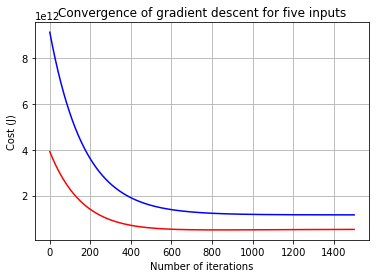

In [22]:
plt.plot(range(1, iterations + 1),cost_history, color='blue') # plotting loss function for all three inputs merged
plt.plot(range(1, iterations + 1),cost_history2, color='red') # plotting loss function for all three inputs merged
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent for Problem 1.a')

In [23]:
# Problem 1.B

In [24]:
theta = np.zeros(12)
theta

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [25]:
x_0 = np.ones((381, 1)) # creating matrix with column of ones
area_train1 = area_train.reshape(381,1)
area_train1[:5]

x_0 = np.ones((381, 1)) # creating matrix with column of ones
bedrooms_train1 = bedrooms_train.reshape(381,1)
bedrooms_train1[:5]

x_0 = np.ones((381, 1)) # creating matrix with column of ones
bathrooms_train1 = bathrooms_train.reshape(381,1)
bathrooms_train1[:5]

x_0 = np.ones((381, 1)) # creating matrix with column of ones
stories_train1 = stories_train.reshape(381,1)
stories_train1[:5]

x_0 = np.ones((381, 1)) # creating matrix with column of ones
parking_train1 = parking_train.reshape(381,1)
parking_train1[:5]

x_0 = np.ones((381, 1)) # creating matrix with column of ones
mainroad_train1 = mainroad_train.reshape(381,1)
mainroad_train1[:5]

x_0 = np.ones((381, 1)) # creating matrix with column of ones
guestroom_train1 = guestroom_train.reshape(381,1)
guestroom_train1[:5]

x_0 = np.ones((381, 1)) # creating matrix with column of ones
basement_train1 = basement_train.reshape(381,1)
basement_train1[:5]

x_0 = np.ones((381, 1)) # creating matrix with column of ones
hotwaterheating_train1 = hotwaterheating_train.reshape(381,1)
hotwaterheating_train1[:5]

x_0 = np.ones((381, 1)) # creating matrix with column of ones
airconditioning_train1 = airconditioning_train.reshape(381,1)
airconditioning_train1[:5]

x_0 = np.ones((381, 1)) # creating matrix with column of ones
prefarea_train1 = prefarea_train.reshape(381,1)
prefarea_train1[:5]

array([[0],
       [0],
       [1],
       [0],
       [0]], dtype=int64)

In [26]:
X = np.hstack((x_0,area_train1,bedrooms_train1,bathrooms_train1,stories_train1,parking_train1, mainroad_train1, guestroom_train1, basement_train1, hotwaterheating_train1, airconditioning_train1, prefarea_train1))
X[:2]

array([[1.00e+00, 4.50e+03, 3.00e+00, 1.00e+00, 2.00e+00, 0.00e+00,
        1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00],
       [1.00e+00, 3.99e+03, 3.00e+00, 1.00e+00, 2.00e+00, 0.00e+00,
        1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00]])

In [27]:
cost = compute_cost(X, price_train, theta)
print('The cost for given values of theta_0 and theta_1 =', cost)

The cost for given values of theta_0 and theta_1 = 9170960481173.027


In [28]:
x_0 = np.ones((164, 1)) # creating matrix with column of ones
area_test1 = area_test.reshape(164,1)
area_test1[:5]

x_0 = np.ones((164, 1)) # creating matrix with column of ones
bedrooms_test1 = bedrooms_test.reshape(164,1)
bedrooms_test1[:5]

x_0 = np.ones((164, 1)) # creating matrix with column of ones
bathrooms_test1 = bathrooms_test.reshape(164,1)
bathrooms_test1[:5]

x_0 = np.ones((164, 1)) # creating matrix with column of ones
stories_test1 = stories_test.reshape(164,1)
stories_test1[:5]

x_0 = np.ones((164, 1)) # creating matrix with column of ones
parking_test1 = parking_test.reshape(164,1)
parking_test1[:5]

x_0 = np.ones((164, 1)) # creating matrix with column of ones
mainroad_test1 = mainroad_test.reshape(164,1)
mainroad_test1[:5]

x_0 = np.ones((164, 1)) # creating matrix with column of ones
guestroom_test1 = guestroom_test.reshape(164,1)
guestroom_test1[:5]

x_0 = np.ones((164, 1)) # creating matrix with column of ones
basement_test1 = basement_test.reshape(164,1)
basement_test1[:5]

x_0 = np.ones((164, 1)) # creating matrix with column of ones
hotwaterheating_test1 = hotwaterheating_test.reshape(164,1)
hotwaterheating_test1[:5]

x_0 = np.ones((164, 1)) # creating matrix with column of ones
airconditioning_test1 = airconditioning_test.reshape(164,1)
airconditioning_test1[:5]

x_0 = np.ones((164, 1)) # creating matrix with column of ones
prefarea_test1 = prefarea_test.reshape(164,1)
prefarea_test1[:5]

array([[0],
       [1],
       [0],
       [0],
       [0]], dtype=int64)

In [29]:
X3 = np.hstack((x_0,area_test1,bedrooms_test1,bathrooms_test1,stories_test1,parking_test1, mainroad_test1, guestroom_test1, basement_test1, hotwaterheating_test1, airconditioning_test1, prefarea_test1))
X3[:2]

array([[1.00e+00, 4.00e+03, 3.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00],
       [1.00e+00, 9.62e+03, 3.00e+00, 1.00e+00, 1.00e+00, 2.00e+00,
        1.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 1.00e+00]])

In [30]:
cost = compute_cost(X3, price_test, theta)
print('The cost for given values of theta_0 and theta_1 =', cost)

The cost for given values of theta_0 and theta_1 = 3935955883486.239


In [31]:
theta, cost_history3, cost_history4 = gradient_descent(X, X3, price_train, price_test, theta, alpha, iterations)
print('Final value of theta = ', theta)
print('cost_history = ', cost_history3)
print('cost_history2 = ', cost_history4)

Final value of theta =  [1.95107227e-01 8.70542163e+02 6.33183968e-01 3.03263314e-01
 4.37606817e-01 1.65178016e-01 1.75320339e-01 5.13075993e-02
 8.97011768e-02 1.77256956e-02 9.93957978e-02 6.57672576e-02]
cost_history =  [9.12365084e+12 9.07662040e+12 9.02986751e+12 ... 1.15573487e+12
 1.15572820e+12 1.15572157e+12]
cost_history2 =  [3.91380236e+12 3.89178562e+12 3.86990484e+12 ... 5.21052186e+11
 5.21073130e+11 5.21094022e+11]


Text(0.5, 1.0, 'Convergence of gradient descent for eleven inputs')

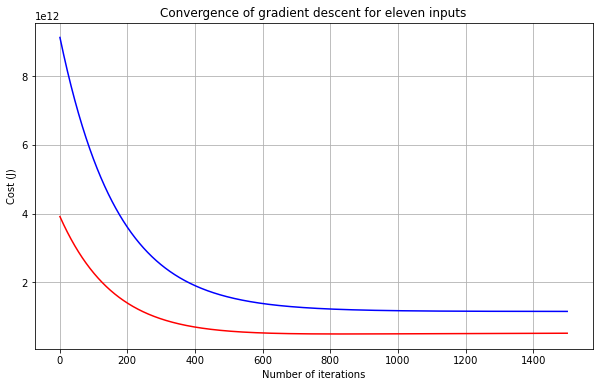

In [32]:
plt.plot(range(1, iterations + 1),cost_history3, color='blue') # plotting loss function for all three inputs merged
plt.plot(range(1, iterations + 1),cost_history4, color='red') # plotting loss function for all three inputs merged
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent for Problem 1.b')

In [33]:
#Problem 2.a

In [ ]:
#Normalization is better than Standardization in my case as it has a lower cost for part A and B

In [ ]:
#Normalization was used for problem 3

In [34]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]
df_Newtrain.head()
# df_Newtest.head()

,area,bedrooms,bathrooms,stories,parking,price
454,4500,3,1,2,0,3143000
392,3990,3,1,2,0,3500000
231,4320,3,1,1,0,4690000
271,1905,5,1,2,0,4340000
250,3510,3,1,3,0,4515000


In [35]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
df_Newtrain[num_vars] = scaler.fit_transform(df_Newtrain[num_vars])
df_Newtest[num_vars] = scaler.fit_transform(df_Newtest[num_vars])
df_Newtrain.head(20)

,area,bedrooms,bathrooms,stories,parking,price
454,0.193548,0.50,0.0,0.333333,0.000000,0.120606
392,0.156495,0.50,0.0,0.333333,0.000000,0.151515
231,0.180471,0.50,0.0,0.000000,0.000000,0.254545
271,0.005013,1.00,0.0,0.333333,0.000000,0.224242
250,0.121622,0.50,0.0,0.666667,0.000000,0.239394
541,0.040976,0.50,0.0,0.000000,0.000000,0.001485
461,0.226969,0.25,0.0,0.000000,0.000000,0.115152
124,0.340671,0.50,0.5,1.000000,0.333333,0.363636
154,0.131793,0.50,0.5,0.333333,0.666667,0.327273
451,0.357018,0.25,0.0,0.000000,0.000000,0.121212


In [36]:
df_Newtrain.shape

(381, 6)

In [37]:
df_Newtest.shape

(164, 6)

In [38]:
theta = np.zeros(6)
theta

array([0., 0., 0., 0., 0., 0.])

In [39]:
area_train = df_Newtrain.values[:, 0]
bedrooms_train = df_Newtrain.values[:, 1]
bathrooms_train = df_Newtrain.values[:, 2]
stories_train = df_Newtrain.values[:, 3]
parking_train = df_Newtrain.values[:, 4]
price_train = df_Newtrain.values[:, 5]

In [40]:
x_0 = np.ones((381, 1)) # creating matrix with column of ones
area_train1 = area_train.reshape(381,1)
area_train1[:5]

x_0 = np.ones((381, 1)) # creating matrix with column of ones
bedrooms_train1 = bedrooms_train.reshape(381,1)
bedrooms_train1[:5]

x_0 = np.ones((381, 1)) # creating matrix with column of ones
bathrooms_train1 = bathrooms_train.reshape(381,1)
bathrooms_train1[:5]

x_0 = np.ones((381, 1)) # creating matrix with column of ones
stories_train1 = stories_train.reshape(381,1)
stories_train1[:5]

x_0 = np.ones((381, 1)) # creating matrix with column of ones
parking_train1 = parking_train.reshape(381,1)
parking_train1[:5]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [41]:
iterations = 1500;
alpha = .003;

In [42]:
X = np.hstack((x_0,area_train1,bedrooms_train1,bathrooms_train1,stories_train1,parking_train1))
X[:2]

array([[1.        , 0.19354839, 0.5       , 0.        , 0.33333333,
        0.        ],
       [1.        , 0.1564952 , 0.5       , 0.        , 0.33333333,
        0.        ]])

In [43]:
cost = compute_cost(X, price_train, theta)
print('The cost for given values of theta_0 and theta_1 =', cost)

The cost for given values of theta_0 and theta_1 = 0.033043906990303365


In [44]:
area_test = df_Newtest.values[:, 0]
bedrooms_test = df_Newtest.values[:, 1]
bathrooms_test = df_Newtest.values[:, 2]
stories_test = df_Newtest.values[:, 3]
parking_test = df_Newtest.values[:, 4]
price_test = df_Newtest.values[:, 5]

In [45]:
x_0 = np.ones((164, 1)) # creating matrix with column of ones
area_test1 = area_test.reshape(164,1)
area_test1[:5]

x_0 = np.ones((164, 1)) # creating matrix with column of ones
bedrooms_test1 = bedrooms_test.reshape(164,1)
bedrooms_test1[:5]

x_0 = np.ones((164, 1)) # creating matrix with column of ones
bathrooms_test1 = bathrooms_test.reshape(164,1)
bathrooms_test1[:5]

x_0 = np.ones((164, 1)) # creating matrix with column of ones
stories_test1 = stories_test.reshape(164,1)
stories_test1[:5]

x_0 = np.ones((164, 1)) # creating matrix with column of ones
parking_test1 = parking_test.reshape(164,1)
parking_test1[:5]

array([[0.33333333],
       [0.66666667],
       [0.        ],
       [0.33333333],
       [0.        ]])

In [46]:
X2 = np.hstack((x_0,area_test1,bedrooms_test1,bathrooms_test1,stories_test1,parking_test1))
X[:2]

array([[1.        , 0.19354839, 0.5       , 0.        , 0.33333333,
        0.        ],
       [1.        , 0.1564952 , 0.5       , 0.        , 0.33333333,
        0.        ]])

In [47]:
cost = compute_cost(X2, price_test, theta)
print('The cost for given values of theta_0 and theta_1 =', cost)

The cost for given values of theta_0 and theta_1 = 0.0171269875637105


In [48]:
theta, cost_history1, cost_history2 = gradient_descent(X, X2, price_train, price_test, theta, alpha, iterations)
print('Final value of theta = ', theta)
print('cost_history = ', cost_history1)
print('cost_history2 = ', cost_history2)

Final value of theta =  [0.14839782 0.07602077 0.09709894 0.07707851 0.08789661 0.08002601]
cost_history =  [0.03281313 0.03258438 0.03235763 ... 0.0058944  0.00589392 0.00589344]
cost_history2 =  [0.01702159 0.01691706 0.01681338 ... 0.00309711 0.00309682 0.00309653]


Text(0.5, 1.0, 'Convergence of gradient descent for eleven inputs')

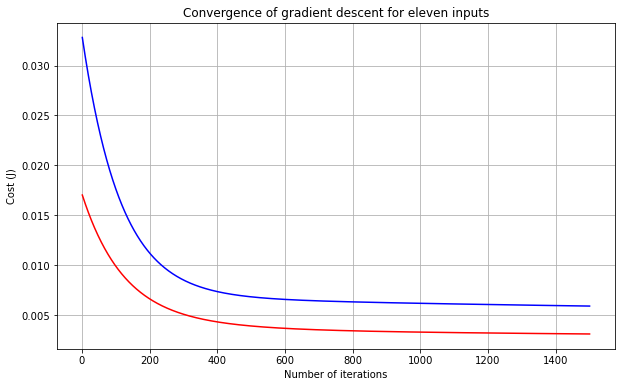

In [49]:
plt.plot(range(1, iterations + 1),cost_history1, color='blue') # plotting loss function for all three inputs merged
plt.plot(range(1, iterations + 1),cost_history2, color='red') # plotting loss function for all three inputs merged
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent for Problem 2.a Normalization')

In [50]:
#Standardization of Data

In [51]:
theta = np.zeros(6)
theta

array([0., 0., 0., 0., 0., 0.])

In [52]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]
# df_Newtrain.head()
# df_Newtest.head()

In [53]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
df_Newtrain[num_vars] = scaler.fit_transform(df_Newtrain[num_vars])
df_Newtest[num_vars] = scaler.fit_transform(df_Newtest[num_vars])
# df_Newtrain.head(20)

In [54]:
area_train = df_Newtrain.values[:, 0]
bedrooms_train = df_Newtrain.values[:, 1]
bathrooms_train = df_Newtrain.values[:, 2]
stories_train = df_Newtrain.values[:, 3]
parking_train = df_Newtrain.values[:, 4]
price_train = df_Newtrain.values[:, 5]

In [55]:
x_0 = np.ones((381, 1)) # creating matrix with column of ones
area_train1 = area_train.reshape(381,1)
area_train1[:5]

x_0 = np.ones((381, 1)) # creating matrix with column of ones
bedrooms_train1 = bedrooms_train.reshape(381,1)
bedrooms_train1[:5]

x_0 = np.ones((381, 1)) # creating matrix with column of ones
bathrooms_train1 = bathrooms_train.reshape(381,1)
bathrooms_train1[:5]

x_0 = np.ones((381, 1)) # creating matrix with column of ones
stories_train1 = stories_train.reshape(381,1)
stories_train1[:5]

x_0 = np.ones((381, 1)) # creating matrix with column of ones
parking_train1 = parking_train.reshape(381,1)
parking_train1[:5]

array([[-0.82296013],
       [-0.82296013],
       [-0.82296013],
       [-0.82296013],
       [-0.82296013]])

In [56]:

iterations = 1500;
alpha = .003;

In [57]:
def compute_cost(X, y, theta): # computing cost for theta
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    j = 1 / (2 * 381) * np.sum(sqrErrors) 
    
    return j

In [58]:
X3 = np.hstack((x_0,area_train1,bedrooms_train1,bathrooms_train1,stories_train1,parking_train1))
X[:2]

array([[1.        , 0.19354839, 0.5       , 0.        , 0.33333333,
        0.        ],
       [1.        , 0.1564952 , 0.5       , 0.        , 0.33333333,
        0.        ]])

In [59]:
cost = compute_cost(X3, price_train, theta)
print('The cost for given values of theta_0 and theta_1 =', cost)

The cost for given values of theta_0 and theta_1 = 0.5


In [60]:
theta = np.zeros(6)
theta

array([0., 0., 0., 0., 0., 0.])

In [61]:
area_test = df_Newtest.values[:, 0]
bedrooms_test = df_Newtest.values[:, 1]
bathrooms_test = df_Newtest.values[:, 2]
stories_test = df_Newtest.values[:, 3]
parking_test = df_Newtest.values[:, 4]
price_test = df_Newtest.values[:, 5]

In [62]:
x_0 = np.ones((164, 1)) # creating matrix with column of ones
area_test1 = area_test.reshape(164,1)
area_test1[:5]

x_0 = np.ones((164, 1)) # creating matrix with column of ones
bedrooms_test1 = bedrooms_test.reshape(164,1)
bedrooms_test1[:5]

x_0 = np.ones((164, 1)) # creating matrix with column of ones
bathrooms_test1 = bathrooms_test.reshape(164,1)
bathrooms_test1[:5]

x_0 = np.ones((164, 1)) # creating matrix with column of ones
stories_test1 = stories_test.reshape(164,1)
stories_test1[:5]

x_0 = np.ones((164, 1)) # creating matrix with column of ones
parking_test1 = parking_test.reshape(164,1)
parking_test1[:5]

array([[ 0.44261462],
       [ 1.65242793],
       [-0.76719868],
       [ 0.44261462],
       [-0.76719868]])

In [63]:
X4 = np.hstack((x_0,area_test1,bedrooms_test1,bathrooms_test1,stories_test1,parking_test1))
X[:2]

array([[1.        , 0.19354839, 0.5       , 0.        , 0.33333333,
        0.        ],
       [1.        , 0.1564952 , 0.5       , 0.        , 0.33333333,
        0.        ]])

In [64]:
cost = compute_cost(X4, price_test, theta)
print('The cost for given values of theta_0 and theta_1 =', cost)

The cost for given values of theta_0 and theta_1 = 0.2152230971128609


In [65]:
theta, cost_history1, cost_history2 = gradient_descent(X3, X4, price_train, price_test, theta, alpha, iterations)
print('Final value of theta = ', theta)
print('cost_history = ', cost_history1)
print('cost_history2 = ', cost_history2)

Final value of theta =  [1.68338659e-16 3.77095804e-01 1.12385602e-01 2.93284379e-01
 2.31610317e-01 1.55355656e-01]
cost_history =  [0.49722024 0.4944707  0.49175106 ... 0.2358141  0.23581389 0.23581368]
cost_history2 =  [0.21384633 0.21248423 0.21113661 ... 0.07738813 0.07738756 0.077387  ]


Text(0.5, 1.0, 'Convergence of gradient descent for eleven inputs')

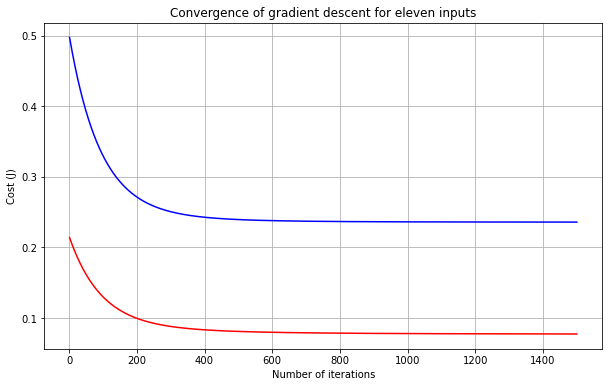

In [66]:
plt.plot(range(1, iterations + 1),cost_history1, color='blue') # plotting loss function for all three inputs merged
plt.plot(range(1, iterations + 1),cost_history2, color='red') # plotting loss function for all three inputs merged
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent for Problem 2.a Standardization')

In [67]:
#At the exact same aplpha, the costs have similar end values but standardization has a better starting value therefore it is better in this case

In [68]:
#Problem 2.b

In [69]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]
df_Newtrain.head()
# df_Newtest.head()

,area,bedrooms,bathrooms,stories,parking,price,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
454,4500,3,1,2,0,3143000,1,0,0,0,1,0
392,3990,3,1,2,0,3500000,1,0,0,0,0,0
231,4320,3,1,1,0,4690000,1,0,0,0,0,1
271,1905,5,1,2,0,4340000,0,0,1,0,0,0
250,3510,3,1,3,0,4515000,1,0,0,0,0,0


In [70]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
df_Newtrain[num_vars] = scaler.fit_transform(df_Newtrain[num_vars])
df_Newtest[num_vars] = scaler.fit_transform(df_Newtest[num_vars])
df_Newtrain.head(20)

,area,bedrooms,bathrooms,stories,parking,price,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
454,0.193548,0.50,0.0,0.333333,0.000000,0.120606,1.0,0.0,0.0,0.0,1.0,0.0
392,0.156495,0.50,0.0,0.333333,0.000000,0.151515,1.0,0.0,0.0,0.0,0.0,0.0
231,0.180471,0.50,0.0,0.000000,0.000000,0.254545,1.0,0.0,0.0,0.0,0.0,1.0
271,0.005013,1.00,0.0,0.333333,0.000000,0.224242,0.0,0.0,1.0,0.0,0.0,0.0
250,0.121622,0.50,0.0,0.666667,0.000000,0.239394,1.0,0.0,0.0,0.0,0.0,0.0
541,0.040976,0.50,0.0,0.000000,0.000000,0.001485,0.0,0.0,0.0,0.0,0.0,0.0
461,0.226969,0.25,0.0,0.000000,0.000000,0.115152,1.0,0.0,1.0,0.0,1.0,0.0
124,0.340671,0.50,0.5,1.000000,0.333333,0.363636,1.0,0.0,0.0,0.0,0.0,0.0
154,0.131793,0.50,0.5,0.333333,0.666667,0.327273,1.0,0.0,0.0,0.0,0.0,0.0
451,0.357018,0.25,0.0,0.000000,0.000000,0.121212,1.0,0.0,0.0,0.0,0.0,0.0


In [71]:
df_Newtrain.shape

(381, 12)

In [72]:
df_Newtest.shape

(164, 12)

In [73]:
theta = np.zeros(12)
theta

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [74]:
area_train = df_Newtrain.values[:, 0]
bedrooms_train = df_Newtrain.values[:, 1]
bathrooms_train = df_Newtrain.values[:, 2]
stories_train = df_Newtrain.values[:, 3]
parking_train = df_Newtrain.values[:, 4]
price_train = df_Newtrain.values[:, 5]
mainroad_train = df_Newtrain.values[:, 6]
guestroom_train = df_Newtrain.values[:, 7]
basement_train = df_Newtrain.values[:, 8]
hotwaterheating_train = df_Newtrain.values[:, 9]
airconditioning_train = df_Newtrain.values[:, 10]
prefarea_train = df_Newtrain.values[:, 11]

In [75]:
x_0 = np.ones((381, 1)) # creating matrix with column of ones
area_train1 = area_train.reshape(381,1)
area_train1[:5]

x_0 = np.ones((381, 1)) # creating matrix with column of ones
bedrooms_train1 = bedrooms_train.reshape(381,1)
bedrooms_train1[:5]

x_0 = np.ones((381, 1)) # creating matrix with column of ones
bathrooms_train1 = bathrooms_train.reshape(381,1)
bathrooms_train1[:5]

x_0 = np.ones((381, 1)) # creating matrix with column of ones
stories_train1 = stories_train.reshape(381,1)
stories_train1[:5]

x_0 = np.ones((381, 1)) # creating matrix with column of ones
parking_train1 = parking_train.reshape(381,1)
parking_train1[:5]

x_0 = np.ones((381, 1)) # creating matrix with column of ones
mainroad_train1 = mainroad_train.reshape(381,1)
mainroad_train1[:5]

x_0 = np.ones((381, 1)) # creating matrix with column of ones
guestroom_train1 = guestroom_train.reshape(381,1)
guestroom_train1[:5]

x_0 = np.ones((381, 1)) # creating matrix with column of ones
basement_train1 = basement_train.reshape(381,1)
basement_train1[:5]

x_0 = np.ones((381, 1)) # creating matrix with column of ones
hotwaterheating_train1 = hotwaterheating_train.reshape(381,1)
hotwaterheating_train1[:5]

x_0 = np.ones((381, 1)) # creating matrix with column of ones
airconditioning_train1 = airconditioning_train.reshape(381,1)
airconditioning_train1[:5]

x_0 = np.ones((381, 1)) # creating matrix with column of ones
prefarea_train1 = prefarea_train.reshape(381,1)
prefarea_train1[:5]

array([[0.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [76]:
X5 = np.hstack((x_0,area_train1,bedrooms_train1,bathrooms_train1,stories_train1,parking_train1, mainroad_train1, guestroom_train1, basement_train1, hotwaterheating_train1, airconditioning_train1, prefarea_train1))
X5[:2]

array([[1.        , 0.19354839, 0.5       , 0.        , 0.33333333,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        1.        , 0.        ],
       [1.        , 0.1564952 , 0.5       , 0.        , 0.33333333,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ]])

In [77]:
cost = compute_cost(X5, price_train, theta)
print('The cost for given values of theta_0 and theta_1 =', cost)

The cost for given values of theta_0 and theta_1 = 0.04726753099662817


In [78]:
x_0 = np.ones((164, 1)) # creating matrix with column of ones
area_test1 = area_test.reshape(164,1)
area_test1[:5]

array([[-0.52840866],
       [ 1.67330604],
       [-0.73996132],
       [ 3.07582182],
       [-0.66160849]])

In [79]:
area_test = df_Newtest.values[:, 0]
bedrooms_test = df_Newtest.values[:, 1]
bathrooms_test = df_Newtest.values[:, 2]
stories_test = df_Newtest.values[:, 3]
parking_test = df_Newtest.values[:, 4]
price_test = df_Newtest.values[:, 5]
mainroad_test = df_Newtest.values[:, 6]
guestroom_test = df_Newtest.values[:, 7]
basement_test = df_Newtest.values[:, 8]
hotwaterheating_test = df_Newtest.values[:, 9]
airconditioning_test = df_Newtest.values[:, 10]
prefarea_test = df_Newtest.values[:, 11]

In [80]:
x_0 = np.ones((164, 1)) # creating matrix with column of ones
area_test1 = area_test.reshape(164,1)
area_test1[:5]

x_0 = np.ones((164, 1)) # creating matrix with column of ones
bedrooms_test1 = bedrooms_test.reshape(164,1)
bedrooms_test1[:5]

x_0 = np.ones((164, 1)) # creating matrix with column of ones
bathrooms_test1 = bathrooms_test.reshape(164,1)
bathrooms_test1[:5]

x_0 = np.ones((164, 1)) # creating matrix with column of ones
stories_test1 = stories_test.reshape(164,1)
stories_test1[:5]

x_0 = np.ones((164, 1)) # creating matrix with column of ones
parking_test1 = parking_test.reshape(164,1)
parking_test1[:5]

x_0 = np.ones((164, 1)) # creating matrix with column of ones
mainroad_test1 = mainroad_test.reshape(164,1)
mainroad_test1[:5]

x_0 = np.ones((164, 1)) # creating matrix with column of ones
guestroom_test1 = guestroom_test.reshape(164,1)
guestroom_test1[:5]

x_0 = np.ones((164, 1)) # creating matrix with column of ones
basement_test1 = basement_test.reshape(164,1)
basement_test1[:5]

x_0 = np.ones((164, 1)) # creating matrix with column of ones
hotwaterheating_test1 = hotwaterheating_test.reshape(164,1)
hotwaterheating_test1[:5]

x_0 = np.ones((164, 1)) # creating matrix with column of ones
airconditioning_test1 = airconditioning_test.reshape(164,1)
airconditioning_test1[:5]

x_0 = np.ones((164, 1)) # creating matrix with column of ones
prefarea_test1 = prefarea_test.reshape(164,1)
prefarea_test1[:5]


array([[0.],
       [1.],
       [0.],
       [0.],
       [0.]])

In [81]:
X6 = np.hstack((x_0,area_test1,bedrooms_test1,bathrooms_test1,stories_test1,parking_test1, mainroad_test1, guestroom_test1, basement_test1, hotwaterheating_test1, airconditioning_test1, prefarea_test1))
X6[:2]

array([[1.        , 0.16151203, 0.4       , 0.        , 0.33333333,
        0.33333333, 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [1.        , 0.54776632, 0.4       , 0.        , 0.        ,
        0.66666667, 1.        , 0.        , 1.        , 0.        ,
        0.        , 1.        ]])

In [82]:
cost = compute_cost(X6, price_test, theta)
print('The cost for given values of theta_0 and theta_1 =', cost)

The cost for given values of theta_0 and theta_1 = 0.024499234179060952


In [83]:
iterations = 1500;
alpha = .003;

In [84]:
theta, cost_history1, cost_history2 = gradient_descent(X5, X6, price_train, price_test, theta, alpha, iterations)
print('Final value of theta = ', theta)
print('cost_history = ', cost_history1)
print('cost_history2 = ', cost_history2)

Final value of theta =  [0.06830634 0.04729607 0.05747168 0.06184105 0.06402687 0.05451622
 0.06969779 0.03721635 0.03501241 0.02350595 0.07953194 0.05938159]
cost_history =  [0.04665317 0.04604843 0.04545314 ... 0.00616484 0.00616412 0.00616339]
cost_history2 =  [0.02421684 0.0239386  0.02366446 ... 0.0035391  0.00353877 0.00353845]


Text(0.5, 1.0, 'Convergence of gradient descent for eleven inputs')

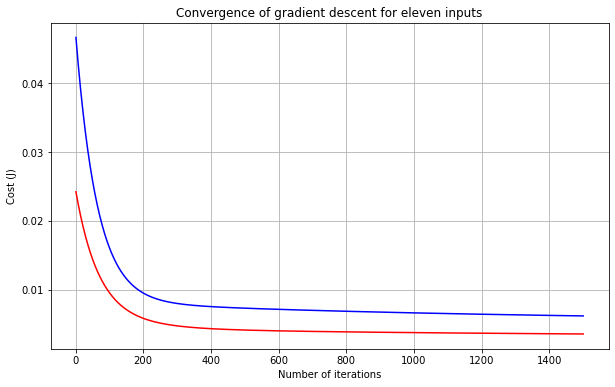

In [85]:
plt.plot(range(1, iterations + 1),cost_history1, color='blue') # plotting loss function for all three inputs merged
plt.plot(range(1, iterations + 1),cost_history2, color='red') # plotting loss function for all three inputs merged
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent for Problem 2.b Normalization')

In [86]:
#Standardization

In [87]:
theta = np.zeros(12)
theta

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [88]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]
df_Newtrain.head()
# df_Newtest.head()

,area,bedrooms,bathrooms,stories,parking,price,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
454,4500,3,1,2,0,3143000,1,0,0,0,1,0
392,3990,3,1,2,0,3500000,1,0,0,0,0,0
231,4320,3,1,1,0,4690000,1,0,0,0,0,1
271,1905,5,1,2,0,4340000,0,0,1,0,0,0
250,3510,3,1,3,0,4515000,1,0,0,0,0,0


In [89]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
df_Newtrain[num_vars] = scaler.fit_transform(df_Newtrain[num_vars])
df_Newtest[num_vars] = scaler.fit_transform(df_Newtest[num_vars])
# df_Newtrain.head(20)

In [90]:
area_train = df_Newtrain.values[:, 0]
bedrooms_train = df_Newtrain.values[:, 1]
bathrooms_train = df_Newtrain.values[:, 2]
stories_train = df_Newtrain.values[:, 3]
parking_train = df_Newtrain.values[:, 4]
price_train = df_Newtrain.values[:, 5]
mainroad_train = df_Newtrain.values[:, 6]
guestroom_train = df_Newtrain.values[:, 7]
basement_train = df_Newtrain.values[:, 8]
hotwaterheating_train = df_Newtrain.values[:, 9]
airconditioning_train = df_Newtrain.values[:, 10]
prefarea_train = df_Newtrain.values[:, 11]

In [91]:
x_0 = np.ones((381, 1)) # creating matrix with column of ones
area_train1 = area_train.reshape(381,1)
area_train1[:5]

x_0 = np.ones((381, 1)) # creating matrix with column of ones
bedrooms_train1 = bedrooms_train.reshape(381,1)
bedrooms_train1[:5]

x_0 = np.ones((381, 1)) # creating matrix with column of ones
bathrooms_train1 = bathrooms_train.reshape(381,1)
bathrooms_train1[:5]

x_0 = np.ones((381, 1)) # creating matrix with column of ones
stories_train1 = stories_train.reshape(381,1)
stories_train1[:5]

x_0 = np.ones((381, 1)) # creating matrix with column of ones
parking_train1 = parking_train.reshape(381,1)
parking_train1[:5]

x_0 = np.ones((381, 1)) # creating matrix with column of ones
mainroad_train1 = mainroad_train.reshape(381,1)
mainroad_train1[:5]

x_0 = np.ones((381, 1)) # creating matrix with column of ones
guestroom_train1 = guestroom_train.reshape(381,1)
guestroom_train1[:5]

x_0 = np.ones((381, 1)) # creating matrix with column of ones
basement_train1 = basement_train.reshape(381,1)
basement_train1[:5]

x_0 = np.ones((381, 1)) # creating matrix with column of ones
hotwaterheating_train1 = hotwaterheating_train.reshape(381,1)
hotwaterheating_train1[:5]

x_0 = np.ones((381, 1)) # creating matrix with column of ones
airconditioning_train1 = airconditioning_train.reshape(381,1)
airconditioning_train1[:5]

x_0 = np.ones((381, 1)) # creating matrix with column of ones
prefarea_train1 = prefarea_train.reshape(381,1)
prefarea_train1[:5]

array([[-0.56421547],
       [-0.56421547],
       [ 1.77237252],
       [-0.56421547],
       [-0.56421547]])

In [92]:
X7 = np.hstack((x_0,area_train1,bedrooms_train1,bathrooms_train1,stories_train1,parking_train1, mainroad_train1, guestroom_train1, basement_train1, hotwaterheating_train1, airconditioning_train1, prefarea_train1))
X5[:2]

array([[1.        , 0.19354839, 0.5       , 0.        , 0.33333333,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        1.        , 0.        ],
       [1.        , 0.1564952 , 0.5       , 0.        , 0.33333333,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ]])

In [93]:
cost = compute_cost(X5, price_train, theta)
print('The cost for given values of theta_0 and theta_1 =', cost)

The cost for given values of theta_0 and theta_1 = 0.5


In [94]:
theta = np.zeros(12)
theta

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [95]:
area_test = df_Newtest.values[:, 0]
bedrooms_test = df_Newtest.values[:, 1]
bathrooms_test = df_Newtest.values[:, 2]
stories_test = df_Newtest.values[:, 3]
parking_test = df_Newtest.values[:, 4]
price_test = df_Newtest.values[:, 5]
mainroad_test = df_Newtest.values[:, 6]
guestroom_test = df_Newtest.values[:, 7]
basement_test = df_Newtest.values[:, 8]
hotwaterheating_test = df_Newtest.values[:, 9]
airconditioning_test = df_Newtest.values[:, 10]
prefarea_test = df_Newtest.values[:, 11]

In [96]:
x_0 = np.ones((164, 1)) # creating matrix with column of ones
area_test1 = area_test.reshape(164,1)
area_test1[:5]

x_0 = np.ones((164, 1)) # creating matrix with column of ones
bedrooms_test1 = bedrooms_test.reshape(164,1)
bedrooms_test1[:5]

x_0 = np.ones((164, 1)) # creating matrix with column of ones
bathrooms_test1 = bathrooms_test.reshape(164,1)
bathrooms_test1[:5]

x_0 = np.ones((164, 1)) # creating matrix with column of ones
stories_test1 = stories_test.reshape(164,1)
stories_test1[:5]

x_0 = np.ones((164, 1)) # creating matrix with column of ones
parking_test1 = parking_test.reshape(164,1)
parking_test1[:5]

x_0 = np.ones((164, 1)) # creating matrix with column of ones
mainroad_test1 = mainroad_test.reshape(164,1)
mainroad_test1[:5]

x_0 = np.ones((164, 1)) # creating matrix with column of ones
guestroom_test1 = guestroom_test.reshape(164,1)
guestroom_test1[:5]

x_0 = np.ones((164, 1)) # creating matrix with column of ones
basement_test1 = basement_test.reshape(164,1)
basement_test1[:5]

x_0 = np.ones((164, 1)) # creating matrix with column of ones
hotwaterheating_test1 = hotwaterheating_test.reshape(164,1)
hotwaterheating_test1[:5]

x_0 = np.ones((164, 1)) # creating matrix with column of ones
airconditioning_test1 = airconditioning_test.reshape(164,1)
airconditioning_test1[:5]

x_0 = np.ones((164, 1)) # creating matrix with column of ones
prefarea_test1 = prefarea_test.reshape(164,1)
prefarea_test1[:5]


array([[-0.53033009],
       [ 1.88561808],
       [-0.53033009],
       [-0.53033009],
       [-0.53033009]])

In [97]:
X8 = np.hstack((x_0,area_test1,bedrooms_test1,bathrooms_test1,stories_test1,parking_test1, mainroad_test1, guestroom_test1, basement_test1, hotwaterheating_test1, airconditioning_test1, prefarea_test1))
X8[:2]

array([[ 1.        , -0.52840866, -0.00769436, -0.55021459,  0.26524149,
         0.44261462,  0.43405737, -0.4827864 , -0.78978629, -0.22645541,
        -0.62436408, -0.53033009],
       [ 1.        ,  1.67330604, -0.00769436, -0.55021459, -0.91042351,
         1.65242793,  0.43405737, -0.4827864 ,  1.26616531, -0.22645541,
        -0.62436408,  1.88561808]])

In [98]:
cost = compute_cost(X8, price_test, theta)
print('The cost for given values of theta_0 and theta_1 =', cost)

The cost for given values of theta_0 and theta_1 = 0.2152230971128609


In [99]:
iterations = 1500;
alpha = .003;

In [100]:
theta, cost_history1, cost_history2 = gradient_descent(X7, X8, price_train, price_test, theta, alpha, iterations)
print('Final value of theta = ', theta)
print('cost_history = ', cost_history1)
print('cost_history2 = ', cost_history2)

Final value of theta =  [1.75283563e-16 2.63927211e-01 6.96052773e-02 2.44898488e-01
 1.93390557e-01 1.20465078e-01 9.48314563e-02 8.68734541e-02
 8.87721979e-02 1.35441505e-01 2.30123277e-01 1.63378441e-01]
cost_history =  [0.49561806 0.49129684 0.4870355  ... 0.17518038 0.17518013 0.17517988]
cost_history2 =  [0.21322131 0.21124658 0.20929852 ... 0.06141368 0.06141381 0.06141394]


Text(0.5, 1.0, 'Convergence of gradient descent for eleven inputs')

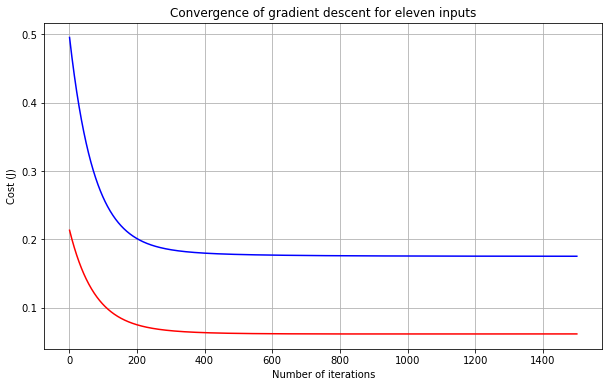

In [101]:
plt.plot(range(1, iterations + 1),cost_history1, color='blue') # plotting loss function for all three inputs merged
plt.plot(range(1, iterations + 1),cost_history2, color='red') # plotting loss function for all three inputs merged
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent for Problem 2.b Standardization')

In [102]:
#Problem 3.a

In [134]:
#Normalization was used for problem 3, the plot for 3.a has a similar but better cost than 2.a

In [ ]:
#Normalization was used for problem 3, the plot for 3.b has a similar but better cost than 2.b

In [103]:
theta = np.zeros(6)
theta

array([0., 0., 0., 0., 0., 0.])

In [104]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]
df_Newtrain.head()
# df_Newtest.head()

,area,bedrooms,bathrooms,stories,parking,price
454,4500,3,1,2,0,3143000
392,3990,3,1,2,0,3500000
231,4320,3,1,1,0,4690000
271,1905,5,1,2,0,4340000
250,3510,3,1,3,0,4515000


In [105]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
df_Newtrain[num_vars] = scaler.fit_transform(df_Newtrain[num_vars])
df_Newtest[num_vars] = scaler.fit_transform(df_Newtest[num_vars])
df_Newtrain.head(20)

,area,bedrooms,bathrooms,stories,parking,price
454,0.193548,0.50,0.0,0.333333,0.000000,0.120606
392,0.156495,0.50,0.0,0.333333,0.000000,0.151515
231,0.180471,0.50,0.0,0.000000,0.000000,0.254545
271,0.005013,1.00,0.0,0.333333,0.000000,0.224242
250,0.121622,0.50,0.0,0.666667,0.000000,0.239394
541,0.040976,0.50,0.0,0.000000,0.000000,0.001485
461,0.226969,0.25,0.0,0.000000,0.000000,0.115152
124,0.340671,0.50,0.5,1.000000,0.333333,0.363636
154,0.131793,0.50,0.5,0.333333,0.666667,0.327273
451,0.357018,0.25,0.0,0.000000,0.000000,0.121212


In [106]:
area_train = df_Newtrain.values[:, 0]
bedrooms_train = df_Newtrain.values[:, 1]
bathrooms_train = df_Newtrain.values[:, 2]
stories_train = df_Newtrain.values[:, 3]
parking_train = df_Newtrain.values[:, 4]
price_train = df_Newtrain.values[:, 5]

In [107]:
x_0 = np.ones((381, 1)) # creating matrix with column of ones
area_train1 = area_train.reshape(381,1)
area_train1[:5]

x_0 = np.ones((381, 1)) # creating matrix with column of ones
bedrooms_train1 = bedrooms_train.reshape(381,1)
bedrooms_train1[:5]

x_0 = np.ones((381, 1)) # creating matrix with column of ones
bathrooms_train1 = bathrooms_train.reshape(381,1)
bathrooms_train1[:5]

x_0 = np.ones((381, 1)) # creating matrix with column of ones
stories_train1 = stories_train.reshape(381,1)
stories_train1[:5]

x_0 = np.ones((381, 1)) # creating matrix with column of ones
parking_train1 = parking_train.reshape(381,1)
parking_train1[:5]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [108]:
X9 = np.hstack((x_0,area_train1,bedrooms_train1,bathrooms_train1,stories_train1,parking_train1))
X9[:2]

array([[1.        , 0.19354839, 0.5       , 0.        , 0.33333333,
        0.        ],
       [1.        , 0.1564952 , 0.5       , 0.        , 0.33333333,
        0.        ]])

In [109]:
cost = compute_cost1(X9, price_train, theta, .01)
print('The cost for given values of theta_0 and theta_1 =', cost)

The cost for given values of theta_0 and theta_1 = 0.033043906990303365


In [110]:
theta = np.zeros(6)
theta

array([0., 0., 0., 0., 0., 0.])

In [111]:
area_test = df_Newtest.values[:, 0]
bedrooms_test = df_Newtest.values[:, 1]
bathrooms_test = df_Newtest.values[:, 2]
stories_test = df_Newtest.values[:, 3]
parking_test = df_Newtest.values[:, 4]
price_test = df_Newtest.values[:, 5]

In [112]:
x_0 = np.ones((164, 1)) # creating matrix with column of ones
area_test1 = area_test.reshape(164,1)
area_test1[:5]

x_0 = np.ones((164, 1)) # creating matrix with column of ones
bedrooms_test1 = bedrooms_test.reshape(164,1)
bedrooms_test1[:5]

x_0 = np.ones((164, 1)) # creating matrix with column of ones
bathrooms_test1 = bathrooms_test.reshape(164,1)
bathrooms_test1[:5]

x_0 = np.ones((164, 1)) # creating matrix with column of ones
stories_test1 = stories_test.reshape(164,1)
stories_test1[:5]

x_0 = np.ones((164, 1)) # creating matrix with column of ones
parking_test1 = parking_test.reshape(164,1)
parking_test1[:5]

array([[0.33333333],
       [0.66666667],
       [0.        ],
       [0.33333333],
       [0.        ]])

In [113]:
X10 = np.hstack((x_0,area_test1,bedrooms_test1,bathrooms_test1,stories_test1,parking_test1))
X10[:2]

array([[1.        , 0.16151203, 0.4       , 0.        , 0.33333333,
        0.33333333],
       [1.        , 0.54776632, 0.4       , 0.        , 0.        ,
        0.66666667]])

In [114]:
cost = compute_cost(X10, price_test, theta)
print('The cost for given values of theta_0 and theta_1 =', cost)

The cost for given values of theta_0 and theta_1 = 0.024499234179060952


In [115]:
theta = np.zeros(6)
iterations = 1500;
alpha = .005;

In [116]:
theta, cost_history1, cost_history2 = gradient_descent1(X9, X10, price_train, price_test, theta, alpha, iterations, 0.01)
print('Final value of theta = ', theta)
print('cost_history = ', cost_history1)
print('cost_history2 = ', cost_history2)

Final value of theta =  [0.14382533 0.08090122 0.09765716 0.0834845  0.09207396 0.08410115]
cost_history =  [0.03277513 0.0325091  0.03224579 ... 0.00578538 0.00578488 0.00578437]
cost_history2 =  [0.02432363 0.0241497  0.02397743 ... 0.004335   0.00433458 0.00433416]


Text(0.5, 1.0, 'Convergence of gradient descent for eleven inputs')

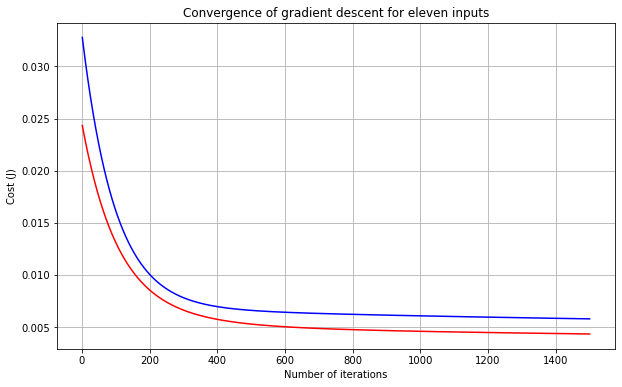

In [117]:
plt.plot(range(1, iterations + 1),cost_history1, color='blue') # plotting loss function for all three inputs merged
plt.plot(range(1, iterations + 1),cost_history2, color='red') # plotting loss function for all three inputs merged
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent for Problem 3.a')

In [118]:
#Problem 3.b

In [119]:
theta = np.zeros(12)
theta

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [120]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]
df_Newtrain.head()
# df_Newtest.head()

,area,bedrooms,bathrooms,stories,parking,price,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
454,4500,3,1,2,0,3143000,1,0,0,0,1,0
392,3990,3,1,2,0,3500000,1,0,0,0,0,0
231,4320,3,1,1,0,4690000,1,0,0,0,0,1
271,1905,5,1,2,0,4340000,0,0,1,0,0,0
250,3510,3,1,3,0,4515000,1,0,0,0,0,0


In [121]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
df_Newtrain[num_vars] = scaler.fit_transform(df_Newtrain[num_vars])
df_Newtest[num_vars] = scaler.fit_transform(df_Newtest[num_vars])
df_Newtrain.head(20)

,area,bedrooms,bathrooms,stories,parking,price,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
454,0.193548,0.50,0.0,0.333333,0.000000,0.120606,1.0,0.0,0.0,0.0,1.0,0.0
392,0.156495,0.50,0.0,0.333333,0.000000,0.151515,1.0,0.0,0.0,0.0,0.0,0.0
231,0.180471,0.50,0.0,0.000000,0.000000,0.254545,1.0,0.0,0.0,0.0,0.0,1.0
271,0.005013,1.00,0.0,0.333333,0.000000,0.224242,0.0,0.0,1.0,0.0,0.0,0.0
250,0.121622,0.50,0.0,0.666667,0.000000,0.239394,1.0,0.0,0.0,0.0,0.0,0.0
541,0.040976,0.50,0.0,0.000000,0.000000,0.001485,0.0,0.0,0.0,0.0,0.0,0.0
461,0.226969,0.25,0.0,0.000000,0.000000,0.115152,1.0,0.0,1.0,0.0,1.0,0.0
124,0.340671,0.50,0.5,1.000000,0.333333,0.363636,1.0,0.0,0.0,0.0,0.0,0.0
154,0.131793,0.50,0.5,0.333333,0.666667,0.327273,1.0,0.0,0.0,0.0,0.0,0.0
451,0.357018,0.25,0.0,0.000000,0.000000,0.121212,1.0,0.0,0.0,0.0,0.0,0.0


In [122]:
area_train = df_Newtrain.values[:, 0]
bedrooms_train = df_Newtrain.values[:, 1]
bathrooms_train = df_Newtrain.values[:, 2]
stories_train = df_Newtrain.values[:, 3]
parking_train = df_Newtrain.values[:, 4]
price_train = df_Newtrain.values[:, 5]
mainroad_train = df_Newtrain.values[:, 6]
guestroom_train = df_Newtrain.values[:, 7]
basement_train = df_Newtrain.values[:, 8]
hotwaterheating_train = df_Newtrain.values[:, 9]
airconditioning_train = df_Newtrain.values[:, 10]
prefarea_train = df_Newtrain.values[:, 11]

In [123]:
x_0 = np.ones((381, 1)) # creating matrix with column of ones
area_train1 = area_train.reshape(381,1)
area_train1[:5]

x_0 = np.ones((381, 1)) # creating matrix with column of ones
bedrooms_train1 = bedrooms_train.reshape(381,1)
bedrooms_train1[:5]

x_0 = np.ones((381, 1)) # creating matrix with column of ones
bathrooms_train1 = bathrooms_train.reshape(381,1)
bathrooms_train1[:5]

x_0 = np.ones((381, 1)) # creating matrix with column of ones
stories_train1 = stories_train.reshape(381,1)
stories_train1[:5]

x_0 = np.ones((381, 1)) # creating matrix with column of ones
parking_train1 = parking_train.reshape(381,1)
parking_train1[:5]

x_0 = np.ones((381, 1)) # creating matrix with column of ones
mainroad_train1 = mainroad_train.reshape(381,1)
mainroad_train1[:5]

x_0 = np.ones((381, 1)) # creating matrix with column of ones
guestroom_train1 = guestroom_train.reshape(381,1)
guestroom_train1[:5]

x_0 = np.ones((381, 1)) # creating matrix with column of ones
basement_train1 = basement_train.reshape(381,1)
basement_train1[:5]

x_0 = np.ones((381, 1)) # creating matrix with column of ones
hotwaterheating_train1 = hotwaterheating_train.reshape(381,1)
hotwaterheating_train1[:5]

x_0 = np.ones((381, 1)) # creating matrix with column of ones
airconditioning_train1 = airconditioning_train.reshape(381,1)
airconditioning_train1[:5]

x_0 = np.ones((381, 1)) # creating matrix with column of ones
prefarea_train1 = prefarea_train.reshape(381,1)
prefarea_train1[:5]

array([[0.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [124]:
X11 = np.hstack((x_0,area_train1,bedrooms_train1,bathrooms_train1,stories_train1,parking_train1, mainroad_train1, guestroom_train1, basement_train1, hotwaterheating_train1, airconditioning_train1, prefarea_train1))
X11[:2]

array([[1.        , 0.19354839, 0.5       , 0.        , 0.33333333,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        1.        , 0.        ],
       [1.        , 0.1564952 , 0.5       , 0.        , 0.33333333,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ]])

In [125]:
cost = compute_cost1(X11, price_train, theta, .01)
print('The cost for given values of theta_0 and theta_1 =', cost)

The cost for given values of theta_0 and theta_1 = 0.033043906990303365


In [126]:
theta = np.zeros(12)
theta

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [127]:
area_test = df_Newtest.values[:, 0]
bedrooms_test = df_Newtest.values[:, 1]
bathrooms_test = df_Newtest.values[:, 2]
stories_test = df_Newtest.values[:, 3]
parking_test = df_Newtest.values[:, 4]
price_test = df_Newtest.values[:, 5]
mainroad_test = df_Newtest.values[:, 6]
guestroom_test = df_Newtest.values[:, 7]
basement_test = df_Newtest.values[:, 8]
hotwaterheating_test = df_Newtest.values[:, 9]
airconditioning_test = df_Newtest.values[:, 10]
prefarea_test = df_Newtest.values[:, 11]

In [128]:
x_0 = np.ones((164, 1)) # creating matrix with column of ones
area_test1 = area_test.reshape(164,1)
area_test1[:5]

x_0 = np.ones((164, 1)) # creating matrix with column of ones
bedrooms_test1 = bedrooms_test.reshape(164,1)
bedrooms_test1[:5]

x_0 = np.ones((164, 1)) # creating matrix with column of ones
bathrooms_test1 = bathrooms_test.reshape(164,1)
bathrooms_test1[:5]

x_0 = np.ones((164, 1)) # creating matrix with column of ones
stories_test1 = stories_test.reshape(164,1)
stories_test1[:5]

x_0 = np.ones((164, 1)) # creating matrix with column of ones
parking_test1 = parking_test.reshape(164,1)
parking_test1[:5]

x_0 = np.ones((164, 1)) # creating matrix with column of ones
mainroad_test1 = mainroad_test.reshape(164,1)
mainroad_test1[:5]

x_0 = np.ones((164, 1)) # creating matrix with column of ones
guestroom_test1 = guestroom_test.reshape(164,1)
guestroom_test1[:5]

x_0 = np.ones((164, 1)) # creating matrix with column of ones
basement_test1 = basement_test.reshape(164,1)
basement_test1[:5]

x_0 = np.ones((164, 1)) # creating matrix with column of ones
hotwaterheating_test1 = hotwaterheating_test.reshape(164,1)
hotwaterheating_test1[:5]

x_0 = np.ones((164, 1)) # creating matrix with column of ones
airconditioning_test1 = airconditioning_test.reshape(164,1)
airconditioning_test1[:5]

x_0 = np.ones((164, 1)) # creating matrix with column of ones
prefarea_test1 = prefarea_test.reshape(164,1)
prefarea_test1[:5]

array([[0.],
       [1.],
       [0.],
       [0.],
       [0.]])

In [129]:
X12 = np.hstack((x_0,area_test1,bedrooms_test1,bathrooms_test1,stories_test1,parking_test1, mainroad_test1, guestroom_test1, basement_test1, hotwaterheating_test1, airconditioning_test1, prefarea_test1))
X12[:2]

array([[1.        , 0.16151203, 0.4       , 0.        , 0.33333333,
        0.33333333, 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [1.        , 0.54776632, 0.4       , 0.        , 0.        ,
        0.66666667, 1.        , 0.        , 1.        , 0.        ,
        0.        , 1.        ]])

In [130]:
cost = compute_cost(X12, price_test, theta)
print('The cost for given values of theta_0 and theta_1 =', cost)

The cost for given values of theta_0 and theta_1 = 0.024499234179060952


In [131]:
theta = np.zeros(6)
iterations = 1500;
alpha = .005;

In [132]:
theta, cost_history1, cost_history2 = gradient_descent1(X9, X10, price_train, price_test, theta, alpha, iterations, 0.01)
print('Final value of theta = ', theta)
print('cost_history = ', cost_history1)
print('cost_history2 = ', cost_history2)

Final value of theta =  [0.14382533 0.08090122 0.09765716 0.0834845  0.09207396 0.08410115]
cost_history =  [0.03277513 0.0325091  0.03224579 ... 0.00578538 0.00578488 0.00578437]
cost_history2 =  [0.02432363 0.0241497  0.02397743 ... 0.004335   0.00433458 0.00433416]


Text(0.5, 1.0, 'Convergence of gradient descent for eleven inputs')

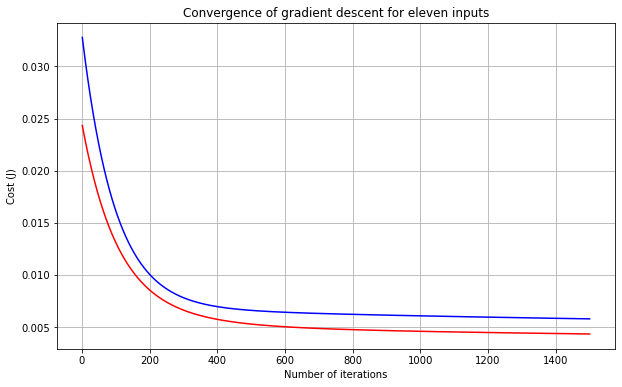

In [133]:
plt.plot(range(1, iterations + 1),cost_history1, color='blue') # plotting loss function for all three inputs merged
plt.plot(range(1, iterations + 1),cost_history2, color='red') # plotting loss function for all three inputs merged
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent for Problem 3.b')